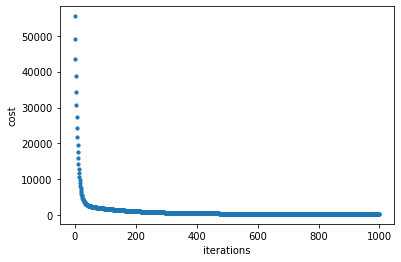

Values of Theta:  [[2.60425564]
 [2.84543431]]
RMSE =  0.27737630220016085


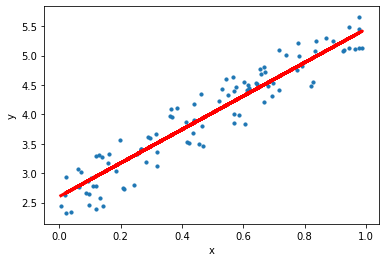

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

#Generate values for x and y using numpy
def generate_data_set(init_seed):
  np.random.seed(init_seed)
  x = np.random.rand(100, 1)
  y = 2 + 3 * x + np.random.rand(100, 1)
  return x, y

def rmse(y_predicted, y_actual):
  # Calculate root mean squared error
	sum_error = 0.0
	for i in range(len(y_actual)):
		prediction_error = y_predicted[i] - y_actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(y_actual))
	return sqrt(mean_error)

#calculating cost based on linear regression formula
def  cal_cost(theta,X,y):
  predictions = X.dot(theta)
  cost = (1/2*m) * np.sum(np.square(predictions-y))
  return cost

#implementing formula of Gradient Descent
def fit_GD(x, y, alpha, n_iterations):
  m = len(y)
  cost_history = np.zeros(n_iterations)
  #predicting theta 1 and theta 0 on random values
  theta = np.random.randn(2,1)
  #creating an array of theta and filling it with 0s
  theta_history = np.zeros((n_iterations,2))

  for it in range(n_iterations):  
    prediction = np.dot(x,theta)    
    theta = theta -(1/m)*alpha*( x.T.dot((prediction - y)))
    theta_history[it,:] =theta.T
    cost_history[it]  = cal_cost(theta,x,y)
        
  return  theta_history, cost_history, theta, prediction

x, y = generate_data_set(0)

m = len(y)
x_train = np.c_[np.ones((m, 1)), x]
# fit/train the model
w, cost_history, theta, pred  = fit_GD(x_train, y, 0.05, 1000)
i=0
w_new = []
iterations = []
while i < len(w):
  iterations.append(i)
  i=i+1

plt.scatter(iterations, cost_history, s=10)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

print("Values of Theta: ", theta)

error = rmse(pred, y)

print("RMSE = ", error)

plt.scatter(x, y, s=10)
plt.plot(x, pred, color='red', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()